# S&P 500 Index: Cluster Analysis with Gaussian Mixture

In [1]:
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
import numpy as np
import pandas as pd
import pandas_datareader as dr
from math import sqrt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler


In [2]:
spx = pd.read_csv('SP500_companies_data.csv', header=0, index_col=0)

In [3]:
spx

,Returns,Volatility,Beta,Sharpe_Ratio,PE
ABT,0.203101,0.219387,0.675190,0.925767,34.078876
ABBV,0.220948,0.284533,NaN,0.776531,31.364618
ABMD,0.465194,0.470735,1.307399,0.988230,66.222670
ACN,0.217336,0.239580,1.091403,0.907153,35.498936
ATVI,0.259882,0.313745,0.601741,0.828323,28.250000
...,...,...,...,...,...
YUM,0.164267,0.253675,1.034782,0.647549,35.140410
ZBRA,0.296886,0.359616,1.585869,0.825566,46.306260
ZBH,0.147811,0.262520,1.349836,0.563045,59.948640
ZION,0.126530,0.333665,1.576630,0.379214,10.601748


In [4]:
spx = spx.dropna()

In [5]:
spx

,Returns,Volatility,Beta,Sharpe_Ratio,PE
ABT,0.203101,0.219387,0.675190,0.925767,34.078876
ABMD,0.465194,0.470735,1.307399,0.988230,66.222670
ACN,0.217336,0.239580,1.091403,0.907153,35.498936
ATVI,0.259882,0.313745,0.601741,0.828323,28.250000
ADBE,0.322720,0.295316,0.952665,1.092794,53.872090
...,...,...,...,...,...
YUM,0.164267,0.253675,1.034782,0.647549,35.140410
ZBRA,0.296886,0.359616,1.585869,0.825566,46.306260
ZBH,0.147811,0.262520,1.349836,0.563045,59.948640
ZION,0.126530,0.333665,1.576630,0.379214,10.601748


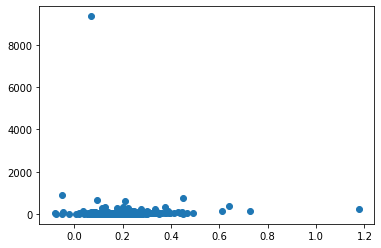

In [6]:
plt.scatter(spx['Returns'], spx['PE']) 

In [7]:
#identify the outlier
print(spx['PE'].idxmax())

COP


In [8]:
spx = spx.drop('COP')

In [9]:
spx

,Returns,Volatility,Beta,Sharpe_Ratio,PE
ABT,0.203101,0.219387,0.675190,0.925767,34.078876
ABMD,0.465194,0.470735,1.307399,0.988230,66.222670
ACN,0.217336,0.239580,1.091403,0.907153,35.498936
ATVI,0.259882,0.313745,0.601741,0.828323,28.250000
ADBE,0.322720,0.295316,0.952665,1.092794,53.872090
...,...,...,...,...,...
YUM,0.164267,0.253675,1.034782,0.647549,35.140410
ZBRA,0.296886,0.359616,1.585869,0.825566,46.306260
ZBH,0.147811,0.262520,1.349836,0.563045,59.948640
ZION,0.126530,0.333665,1.576630,0.379214,10.601748


In [10]:
scaler = StandardScaler()
spx_tr = scaler.fit_transform(spx)
spx_tr = pd.DataFrame(spx_tr, index=spx.index, columns=spx.columns)

In [11]:
X = spx_tr
gm = GaussianMixture(n_components=6, random_state=0)
gm = gm.fit(X)
label = gm.predict(X)
label_prob = gm.predict_proba(X)

In [12]:
spx_tr['Cluster'] = label
spx_tr

,Returns,Volatility,Beta,Sharpe_Ratio,PE,Cluster
ABT,0.093846,-0.961184,-0.771890,1.005034,-0.179361,4
ABMD,2.589162,2.029424,0.515916,1.238327,0.209128,5
ACN,0.229373,-0.720917,0.075933,0.935514,-0.162198,4
ATVI,0.634442,0.161514,-0.921506,0.641092,-0.249808,0
ADBE,1.232702,-0.057756,-0.206675,1.628861,0.059859,0
...,...,...,...,...,...,...
YUM,-0.275883,-0.553216,-0.039403,-0.034077,-0.166531,4
ZBRA,0.986752,0.707298,1.083158,0.630797,-0.031581,0
ZBH,-0.432556,-0.447969,0.602360,-0.349688,0.133300,1
ZION,-0.635159,0.398530,1.064338,-1.036274,-0.463104,1


In [13]:
u_labels = np.unique(label)
centroids=[]

for i in u_labels:   
    centroid = spx_tr.loc[spx_tr['Cluster']==i].mean().values
    centroids.append(centroid)

df_centroids=pd.DataFrame(centroids,columns=['Returns','Volatility','Beta','Sharpe_Ratio','PE','Cluster'])
df_centroids['Cluster']=df_centroids.index
df_centroids    

,Returns,Volatility,Beta,Sharpe_Ratio,PE,Cluster
0,0.722964,0.014717,0.001166,0.901544,0.329058,0
1,-0.453609,-0.009773,0.382291,-0.624788,-0.320674,1
2,-0.176349,1.052059,2.374596,-0.481566,8.283566,2
3,4.193778,3.937082,1.393723,1.267860,1.697838,3
4,-0.155992,-0.866767,-0.719619,0.443785,-0.225450,4
5,-0.199009,1.102428,0.330771,-0.878813,-0.060415,5


<AxesSubplot:>

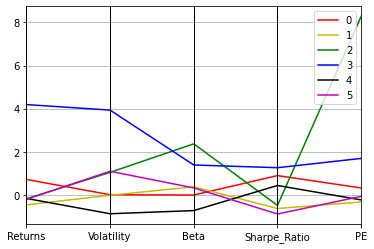

In [14]:
pd.plotting.parallel_coordinates(df_centroids,'Cluster', color=('r', 'y', 'g', 'b','k','m'))


In [15]:
details = [(name,cluster) for name, cluster in zip(spx.index,label)]
for detail in details:
    print(detail)

('ABT', 4)
('ABMD', 5)
('ACN', 4)
('ATVI', 0)
('ADBE', 0)
('AMD', 3)
('AAP', 1)
('AFL', 1)
('A', 1)
('APD', 4)
('AKAM', 5)
('ALB', 5)
('ARE', 4)
('ALGN', 5)
('ALLE', 1)
('LNT', 4)
('ALL', 4)
('GOOGL', 4)
('GOOG', 4)
('MO', 4)
('AMZN', 0)
('AMCR', 1)
('AEE', 4)
('AEP', 4)
('AXP', 1)
('AMT', 4)
('AWK', 4)
('AMP', 1)
('AME', 4)
('AMGN', 4)
('APH', 4)
('ADI', 1)
('ANSS', 0)
('ANTM', 1)
('AOS', 4)
('APA', 2)
('AAPL', 0)
('AMAT', 0)
('APTV', 0)
('ADM', 1)
('ANET', 5)
('AJG', 4)
('AIZ', 4)
('ATO', 4)
('ADSK', 0)
('ADP', 4)
('AZO', 4)
('AVB', 1)
('AVY', 1)
('BLL', 4)
('BAC', 1)
('BK', 1)
('BAX', 4)
('BDX', 4)
('BBY', 5)
('BIO', 4)
('BIIB', 5)
('BLK', 1)
('BKNG', 0)
('BWA', 5)
('BSX', 0)
('AVGO', 0)
('BR', 4)
('CHRW', 5)
('COG', 5)
('CDNS', 0)
('CPB', 4)
('COF', 1)
('CAH', 1)
('KMX', 1)
('CTLT', 0)
('CAT', 1)
('CBOE', 4)
('CBRE', 1)
('CDW', 0)
('CE', 1)
('CNC', 5)
('CNP', 1)
('CF', 5)
('CRL', 0)
('SCHW', 1)
('CHTR', 0)
('CMG', 0)
('CB', 4)
('CHD', 4)
('CI', 1)
('CINF', 4)
('CTAS', 0)
('CSCO', 1

In [16]:
spx['Cluster'] = label

In [17]:
spx

,Returns,Volatility,Beta,Sharpe_Ratio,PE,Cluster
ABT,0.203101,0.219387,0.675190,0.925767,34.078876,4
ABMD,0.465194,0.470735,1.307399,0.988230,66.222670,5
ACN,0.217336,0.239580,1.091403,0.907153,35.498936,4
ATVI,0.259882,0.313745,0.601741,0.828323,28.250000,0
ADBE,0.322720,0.295316,0.952665,1.092794,53.872090,0
...,...,...,...,...,...,...
YUM,0.164267,0.253675,1.034782,0.647549,35.140410,4
ZBRA,0.296886,0.359616,1.585869,0.825566,46.306260,0
ZBH,0.147811,0.262520,1.349836,0.563045,59.948640,1
ZION,0.126530,0.333665,1.576630,0.379214,10.601748,1


In [18]:
for i in u_labels:
    print('Cluster',i,':',(spx['Cluster']==i).sum())


Cluster 0 : 87
Cluster 1 : 127
Cluster 2 : 4
Cluster 3 : 7
Cluster 4 : 127
Cluster 5 : 71


In [19]:
spx.loc[spx['Cluster']==2]

,Returns,Volatility,Beta,Sharpe_Ratio,PE,Cluster
APA,-0.051338,0.522102,4.928726,-0.098330,892.85720,2
EOG,0.093220,0.384324,2.161588,0.242555,674.62964,2
FIS,0.208126,0.240924,0.854347,0.863868,596.20000,2
NOW,0.448877,0.407016,0.934782,1.102848,773.53950,2


In [20]:
spx.loc[spx['Cluster']==3]

,Returns,Volatility,Beta,Sharpe_Ratio,PE,Cluster
AMD,0.411510,0.587823,2.049510,0.700058,37.430386,3
ENPH,0.727811,0.858094,1.144178,0.848171,149.173870,3
ETSY,0.490193,0.599827,1.548913,0.817224,52.118717,3
MRNA,1.177321,0.836265,1.470843,1.407833,236.997330,3
PAYC,0.612874,0.466787,1.391847,1.312963,160.642560,3
PENN,0.374676,0.515123,2.575543,0.727353,327.177000,3
TSLA,0.641748,0.553537,1.987486,1.159358,362.256200,3


In [21]:
spx.loc[spx['Cluster']==0]

,Returns,Volatility,Beta,Sharpe_Ratio,PE,Cluster
ATVI,0.259882,0.313745,0.601741,0.828323,28.250000,0
ADBE,0.322720,0.295316,0.952665,1.092794,53.872090,0
AMZN,0.339881,0.316463,1.151795,1.074001,57.977000,0
ANSS,0.230593,0.268315,1.212187,0.859411,70.089400,0
AAPL,0.300154,0.284566,1.207290,1.054778,28.555208,0
...,...,...,...,...,...,...
WST,0.302804,0.251467,0.986942,1.204151,60.150480,0
XLNX,0.229086,0.309877,1.005978,0.739280,57.190840,0
XYL,0.205124,0.264334,1.023369,0.776001,75.359280,0
ZBRA,0.296886,0.359616,1.585869,0.825566,46.306260,0
